In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('query_result_f.csv',sep=",")
data.info() # столбцы ndr_tickets и total price не полностью заполнены данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       127 non-null    int64  
 1   departure_city  127 non-null    object 
 2   arrival_city    127 non-null    object 
 3   model_aircraft  127 non-null    object 
 4   flight_minutes  127 non-null    float64
 5   longitude       127 non-null    float64
 6   latitude        127 non-null    float64
 7   nbr_tickets     118 non-null    float64
 8   nbr_seats       127 non-null    int64  
 9   total_price     118 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 10.0+ KB


In [18]:
data.columns

Index(['flight_id', 'departure_city', 'arrival_city', 'model_aircraft',
       'flight_minutes', 'longitude', 'latitude', 'nbr_tickets', 'nbr_seats',
       'total_price'],
      dtype='object')

Добавляем новые столбцы: стоимость топлива, заполняемость самолета, выручка=цена за билеты - цена за топливо


In [19]:
data.loc[ data.model_aircraft=='Boeing 737-300', 'oil_price'] = data.flight_minutes/60*2.5*37860
data.loc[ data.model_aircraft=='Sukhoi Superjet-100', 'oil_price'] = data.flight_minutes/60*1.7*37860
data['seat_usability']=data.nbr_tickets/data.nbr_seats*100
data.loc[:,'flight_profit']=data.total_price-data.oil_price

In [20]:
data=data.set_index('flight_id') # индекс теперь это id рейса
data.head(2)

,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136119,Anapa,Moscow,Boeing 737-300,101.0,37.4146,55.972599,113.0,130,1653000.0,159327.5,86.923077,1493672.5
136120,Anapa,Moscow,Boeing 737-300,99.0,37.4146,55.972599,109.0,130,1605400.0,156172.5,83.846154,1449227.5


Boeing 737-300         68
Sukhoi Superjet-100    59
Name: model_aircraft, dtype: int64

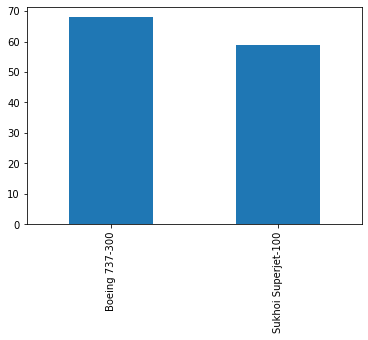

In [21]:
data.model_aircraft.value_counts().plot.bar() # какие используются модели самолетов
data.model_aircraft.value_counts()

Belgorod        59
Moscow          59
Novokuznetsk     9
Name: arrival_city, dtype: int64

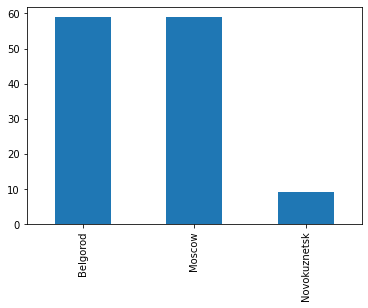

In [22]:
data.arrival_city.value_counts().plot.bar()
data.arrival_city.value_counts()

In [23]:
data[data['nbr_tickets'].isna()] # 9 рейсов не имееют информации о билетах

,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136511,Anapa,Novokuznetsk,Boeing 737-300,310.0,86.877197,53.811401,NaN,130,NaN,489025.0,NaN,NaN
136513,Anapa,Novokuznetsk,Boeing 737-300,310.0,86.877197,53.811401,NaN,130,NaN,489025.0,NaN,NaN
136514,Anapa,Novokuznetsk,Boeing 737-300,299.0,86.877197,53.811401,NaN,130,NaN,471672.5,NaN,NaN
136523,Anapa,Novokuznetsk,Boeing 737-300,312.0,86.877197,53.811401,NaN,130,NaN,492180.0,NaN,NaN
136540,Anapa,Novokuznetsk,Boeing 737-300,307.0,86.877197,53.811401,NaN,130,NaN,484292.5,NaN,NaN
136544,Anapa,Novokuznetsk,Boeing 737-300,304.0,86.877197,53.811401,NaN,130,NaN,479560.0,NaN,NaN
136546,Anapa,Novokuznetsk,Boeing 737-300,302.0,86.877197,53.811401,NaN,130,NaN,476405.0,NaN,NaN
136560,Anapa,Novokuznetsk,Boeing 737-300,305.0,86.877197,53.811401,NaN,130,NaN,481137.5,NaN,NaN
136567,Anapa,Novokuznetsk,Boeing 737-300,311.0,86.877197,53.811401,NaN,130,NaN,490602.5,NaN,NaN


In [25]:
data=data.dropna(axis =0) # удаляем строки с неполной информацией
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 136119 to 136956
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   departure_city  118 non-null    object 
 1   arrival_city    118 non-null    object 
 2   model_aircraft  118 non-null    object 
 3   flight_minutes  118 non-null    float64
 4   longitude       118 non-null    float64
 5   latitude        118 non-null    float64
 6   nbr_tickets     118 non-null    float64
 7   nbr_seats       118 non-null    int64  
 8   total_price     118 non-null    float64
 9   oil_price       118 non-null    float64
 10  seat_usability  118 non-null    float64
 11  flight_profit   118 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 12.0+ KB


,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136122,Anapa,Moscow,Boeing 737-300,100.0,37.414600,55.972599,97.0,130,1431000.0,157750.0,74.615385,1273250.0
136360,Anapa,Moscow,Boeing 737-300,100.0,37.414600,55.972599,97.0,130,1455400.0,157750.0,74.615385,1297650.0
136642,Anapa,Belgorod,Sukhoi Superjet-100,49.0,36.590099,50.643799,64.0,97,531000.0,52562.3,65.979381,478437.7
136807,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,68.0,97,531000.0,53635.0,70.103093,477365.0


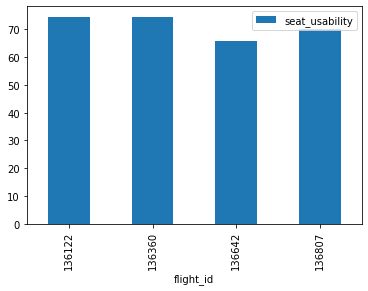

In [31]:
data[data['seat_usability']<=75].plot.bar(y=('seat_usability')) # 4 рейса с заполняемостью ниже 75 процентов
data[data['seat_usability']<=75]

In [38]:
top_profit=data.sort_values(by='flight_profit', ascending=False).head(5)
top_profit.head()

,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136316,Anapa,Moscow,Boeing 737-300,100.0,37.4146,55.972599,130.0,130,1886000.0,157750.0,100.000000,1728250.0
136226,Anapa,Moscow,Boeing 737-300,100.0,37.4146,55.972599,130.0,130,1886000.0,157750.0,100.000000,1728250.0
136389,Anapa,Moscow,Boeing 737-300,100.0,37.4146,55.972599,129.0,130,1873800.0,157750.0,99.230769,1716050.0
136403,Anapa,Moscow,Boeing 737-300,100.0,37.4146,55.972599,129.0,130,1873800.0,157750.0,99.230769,1716050.0
136423,Anapa,Moscow,Boeing 737-300,100.0,37.4146,55.972599,129.0,130,1849400.0,157750.0,99.230769,1691650.0


In [41]:
top_profit_loss=data.sort_values(by='flight_profit', ascending=True).head(5)
top_profit_loss.head()


,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136807,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,68.0,97,531000.0,53635.0,70.103093,477365.0
136642,Anapa,Belgorod,Sukhoi Superjet-100,49.0,36.590099,50.643799,64.0,97,531000.0,52562.3,65.979381,478437.7
136844,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,79.0,97,575100.0,53635.0,81.443299,521465.0
136887,Anapa,Belgorod,Sukhoi Superjet-100,49.0,36.590099,50.643799,78.0,97,595200.0,52562.3,80.412371,542637.7
136922,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,76.0,97,607800.0,53635.0,78.350515,554165.0


In [44]:
top_profit_loss[['seat_usability','flight_profit','flight_minutes']].describe()

,seat_usability,flight_profit,flight_minutes
count,5.000000,5.000000,5.000000
mean,75.257732,514814.080000,49.600000
std,6.838402,35681.080723,0.547723
min,65.979381,477365.000000,49.000000
25%,70.103093,478437.700000,49.000000
50%,78.350515,521465.000000,50.000000
75%,80.412371,542637.700000,50.000000
max,81.443299,554165.000000,50.000000


In [33]:
top_profit=data.sort_values(by='flight_profit', ascending=True).head(5)
top_profit.head()

,departure_city,arrival_city,model_aircraft,flight_minutes,longitude,latitude,nbr_tickets,nbr_seats,total_price,oil_price,seat_usability,flight_profit
flight_id,,,,,,,,,,,,
136807,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,68.0,97,531000.0,53635.0,70.103093,477365.0
136642,Anapa,Belgorod,Sukhoi Superjet-100,49.0,36.590099,50.643799,64.0,97,531000.0,52562.3,65.979381,478437.7
136844,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,79.0,97,575100.0,53635.0,81.443299,521465.0
136887,Anapa,Belgorod,Sukhoi Superjet-100,49.0,36.590099,50.643799,78.0,97,595200.0,52562.3,80.412371,542637.7
136922,Anapa,Belgorod,Sukhoi Superjet-100,50.0,36.590099,50.643799,76.0,97,607800.0,53635.0,78.350515,554165.0


<AxesSubplot:xlabel='flight_id'>

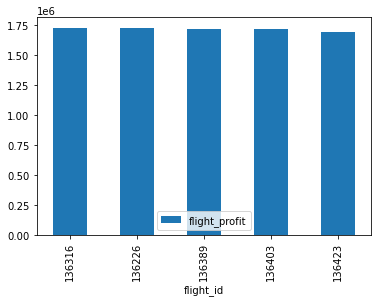

In [50]:
top_profit.plot.bar(y=('flight_profit'))